In [1]:
%matplotlib notebook

import sys
import numpy as np
import scipy.spatial.distance as dist
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as sio
from sklearn.linear_model import LinearRegression
import h5py
import math
from scipy.stats import multivariate_normal
from scipy.stats.mstats import gmean
from scipy.integrate import dblquad
import scipy
import multiprocessing as mp
import copy
from scipy import stats
import rasterio as rio
import numpy as np
import utm
from scipy import signal
import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.gaussian_process.kernels import RBF
from sklearn.kernel_ridge import KernelRidge
from scipy.sparse.linalg import lsqr
from numpy.linalg import norm
from scipy.linalg import fractional_matrix_power
import pickle
from scipy import ndimage

matplotlib.rc('xtick', labelsize=11) 
matplotlib.rc('ytick', labelsize=11)



### Check the system setup

In [2]:
import psutil
import platform
from datetime import datetime
import socket
import uuid
import cpuinfo
import re


def get_size(bytes, suffix="B"):
    """
    Scale bytes to its proper format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor

def System_information():
    print("="*40, "System Information", "="*40)
    uname = platform.uname()
    print(f"System: {uname.system}")
    print(f"Node Name: {uname.node}")
    print(f"Release: {uname.release}")
    print(f"Version: {uname.version}")
    print(f"Machine: {uname.machine}")
    print(f"Processor: {uname.processor}")
    print(f"Processor: {cpuinfo.get_cpu_info()['brand_raw']}")
    print(f"Ip-Address: {socket.gethostbyname(socket.gethostname())}")
    print(f"Mac-Address: {':'.join(re.findall('..', '%012x' % uuid.getnode()))}")


    # Boot Time
    print("="*40, "Boot Time", "="*40)
    boot_time_timestamp = psutil.boot_time()
    bt = datetime.fromtimestamp(boot_time_timestamp)
    print(f"Boot Time: {bt.year}/{bt.month}/{bt.day} {bt.hour}:{bt.minute}:{bt.second}")


    # print CPU information
    print("="*40, "CPU Info", "="*40)
    # number of cores
    print("Physical cores:", psutil.cpu_count(logical=False))
    print("Total cores:", psutil.cpu_count(logical=True))
    # CPU frequencies
    cpufreq = psutil.cpu_freq()
    print(f"Max Frequency: {cpufreq.max:.2f}Mhz")
    print(f"Min Frequency: {cpufreq.min:.2f}Mhz")
    print(f"Current Frequency: {cpufreq.current:.2f}Mhz")
    # CPU usage
    print("CPU Usage Per Core:")
    for i, percentage in enumerate(psutil.cpu_percent(percpu=True, interval=1)):
        print(f"Core {i}: {percentage}%")
    print(f"Total CPU Usage: {psutil.cpu_percent()}%")


    # Memory Information
    print("="*40, "Memory Information", "="*40)
    # get the memory details
    svmem = psutil.virtual_memory()
    print(f"Total: {get_size(svmem.total)}")
    print(f"Available: {get_size(svmem.available)}")
    print(f"Used: {get_size(svmem.used)}")
    print(f"Percentage: {svmem.percent}%")



    print("="*20, "SWAP", "="*20)
    # get the swap memory details (if exists)
    swap = psutil.swap_memory()
    print(f"Total: {get_size(swap.total)}")
    print(f"Free: {get_size(swap.free)}")
    print(f"Used: {get_size(swap.used)}")
    print(f"Percentage: {swap.percent}%")



    # Disk Information
    print("="*40, "Disk Information", "="*40)
    print("Partitions and Usage:")
    # get all disk partitions
    partitions = psutil.disk_partitions()
    for partition in partitions:
        print(f"=== Device: {partition.device} ===")
        print(f"  Mountpoint: {partition.mountpoint}")
        print(f"  File system type: {partition.fstype}")
        try:
            partition_usage = psutil.disk_usage(partition.mountpoint)
        except PermissionError:
            # this can be catched due to the disk that
            # isn't ready
            continue
        print(f"  Total Size: {get_size(partition_usage.total)}")
        print(f"  Used: {get_size(partition_usage.used)}")
        print(f"  Free: {get_size(partition_usage.free)}")
        print(f"  Percentage: {partition_usage.percent}%")
    # get IO statistics since boot
    disk_io = psutil.disk_io_counters()
    print(f"Total read: {get_size(disk_io.read_bytes)}")
    print(f"Total write: {get_size(disk_io.write_bytes)}")

    ## Network information
    print("="*40, "Network Information", "="*40)
    ## get all network interfaces (virtual and physical)
    if_addrs = psutil.net_if_addrs()
    for interface_name, interface_addresses in if_addrs.items():
        for address in interface_addresses:
            print(f"=== Interface: {interface_name} ===")
            if str(address.family) == 'AddressFamily.AF_INET':
                print(f"  IP Address: {address.address}")
                print(f"  Netmask: {address.netmask}")
                print(f"  Broadcast IP: {address.broadcast}")
            elif str(address.family) == 'AddressFamily.AF_PACKET':
                print(f"  MAC Address: {address.address}")
                print(f"  Netmask: {address.netmask}")
                print(f"  Broadcast MAC: {address.broadcast}")
    ##get IO statistics since boot
    net_io = psutil.net_io_counters()
    print(f"Total Bytes Sent: {get_size(net_io.bytes_sent)}")
    print(f"Total Bytes Received: {get_size(net_io.bytes_recv)}")




System_information()
platform.processor()

======================================== System Information ========================================
System: Linux
Node Name: yachay.engr.wustl.edu
Release: 5.10.16-1.el8.elrepo.x86_64
Version: #1 SMP Thu Feb 11 17:44:06 EST 2021
Machine: x86_64
Processor: x86_64
Processor: Intel(R) Xeon(R) Gold 6130 CPU @ 2.10GHz
Ip-Address: 10.24.76.93
Mac-Address: dd:fb:c2:cd:71:d5
======================================== Boot Time ========================================
Boot Time: 2023/3/8 13:8:20
======================================== CPU Info ========================================
Physical cores: 16
Total cores: 32
Max Frequency: 3700.00Mhz
Min Frequency: 1000.00Mhz
Current Frequency: 2234.33Mhz
CPU Usage Per Core:
Core 0: 0.0%
Core 1: 0.0%
Core 2: 2.0%
Core 3: 42.4%
Core 4: 24.0%
Core 5: 47.5%
Core 6: 12.7%
Core 7: 11.0%
Core 8: 5.9%
Core 9: 3.0%
Core 10: 0.0%
Core 11: 8.9%
Core 12: 0.0%
Core 13: 0.0%
Core 14: 0.0%
Core 15: 0.0%
Core 16: 1.0%
Core 17: 0.0%
Core 18: 0.0%
Core 19: 1.0%
Core 2

'x86_64'

## Outdoor Dataset Loading

In [3]:

import json
data_file = 'campus.json'
with open(data_file) as f:
    data = json.load(f)

# Utah campus boudary
BLLatLonCamp = (40.75413, -111.85390)
TRLatLonCamp = (40.77500, -111.82632)
BLCoordCamp = utm.from_latlon(BLLatLonCamp[0], BLLatLonCamp[1])[:2]
TRCoordCamp = utm.from_latlon(TRLatLonCamp[0], TRLatLonCamp[1])[:2]

BLCoordCamp1 = (BLCoordCamp[0], BLCoordCamp[1]+200)
TRCoordCamp1 = (BLCoordCamp1[0]+2200, BLCoordCamp1[1]+2100)

## Raw data checking: 
    please see https://zenodo.org/record/7259895#.ZErjrezML0q for more information
    

In [4]:
len(data),BLCoordCamp1, TRCoordCamp1

(4138,
 (427919.10217312886, 4512014.3997116005),
 (430119.10217312886, 4514114.3997116005))

## Canopy Height Model (CHM) measurement loading
    This is for comparing the loss field estimate with the University of Utah campus

min and max 61.569946 0.0 61.569946
BLCampIdx, TRCampIdx (1156, 5238) (5556, 1038)
MapCamp shape (4400, 4200)
ncols nrows 4400 4200
yticks [   0  600 1200 1800 2400 3000 3600 4200]
xticks [   0  600 1200 1800 2400 3000 3600 4200]


<IPython.core.display.Javascript object>


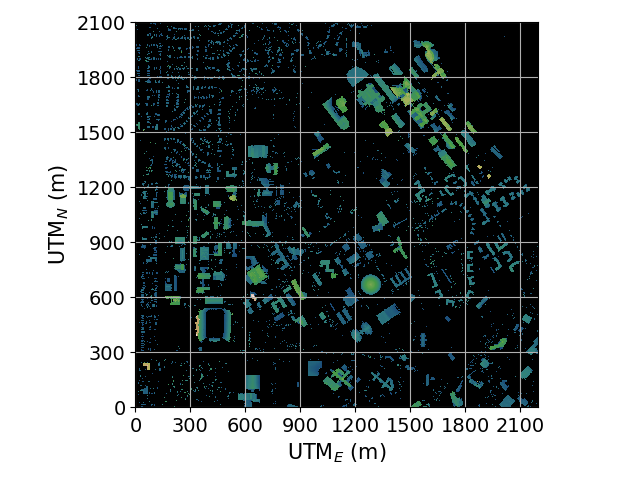

In [5]:
#Canopy Height Model (CHM) from a State of Utah 2013-2014 LiDAR survey. 
#This map includes the University of Utah campus and surrounding area.
#The CHM includes heights of buildings and trees.

import rasterio as rio
import numpy as np
import utm

dsm_object = rio.open('CHM1/CHM.tif')
dsm_map = dsm_object.read(1)     # a np.array containing elevation values
dsm_map -= dsm_map.min()
dsm_resolution = dsm_object.res     # a tuple containing x,y resolution (0.5 meters) 
print('min and max', np.max(dsm_map),np.min(dsm_map), np.max(dsm_map)-np.min(dsm_map))

dsm_transform = dsm_object.transform     # an Affine transform for conversion to UTM-12 coordinates
utm_transform = np.array(dsm_transform).reshape((3,3))[:2]
utm_top_left = utm_transform @ np.array([0,0,1])

# use utm 12 T for precision check
TLCoord = utm_top_left


# campus map boudary

# to accomodate circulator route: BLCoordCamp[1]+500
BLCampIdx = (int(round((BLCoordCamp1[0]-TLCoord[0])/dsm_resolution[0])), \
             int(round((TLCoord[1]-BLCoordCamp1[1])/dsm_resolution[1])))
TRCampIdx = (int(round((TRCoordCamp1[0]-TLCoord[0])/dsm_resolution[0])), \
             int(round((TLCoord[1]-TRCoordCamp1[1])/dsm_resolution[1])))
print('BLCampIdx, TRCampIdx',BLCampIdx, TRCampIdx)

# campus map
MapCamp = dsm_map.T[BLCampIdx[0]:TRCampIdx[0], TRCampIdx[1]:BLCampIdx[1]]
print('MapCamp shape', np.shape(MapCamp))

ncols_chm, nrows_chm = np.shape(MapCamp)
print('ncols nrows',ncols_chm, nrows_chm)
xticks = np.arange(0,ncols_chm,600)
yticks = np.arange(0,nrows_chm+100,600)
print('yticks',yticks)
print('xticks',xticks)


campmap = np.flip(MapCamp, axis=1).T
plt.figure(figsize=(6.4,4.8))
plt.imshow(campmap*(campmap>10), cmap='gist_earth', alpha=1,interpolation = None,origin='lower') #plt.cm.viridis
plt.xlim([0, ncols_chm])
plt.ylim([0, nrows_chm])
plt.xlabel('UTM$_E$ (m)', fontsize=15)
plt.ylabel('UTM$_N$ (m)', fontsize=15)

xtick_labels = [str(int(i*dsm_resolution[0])) for i in xticks]
ytick_labels = [str(int(i*dsm_resolution[1])) for i in yticks]
plt.xticks(xticks,xtick_labels,fontsize=14,rotation=0)
plt.yticks(yticks,ytick_labels,fontsize=14,rotation=-0)
plt.grid()
plt.tight_layout()
# plot_color_gradients('Sequential',
#                      ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

In [6]:

def calcRSSAllOutdoorLabels(data, labels, BLCoord, TRCoord):
    '''
    Input
    ----
        data:    dictionary, outdoor dataset
        labels:  dictionary, four types of receivers
        BLCoord: 2D coordinates as the lower left boundary
        TRCoord: 2D coordinates as the upper right boundary
    Output
    ----
        rssLinks: dictionary, RSS vector for each receiver type
        disLinks: dictionary, distance vector for each receiver type
        rxCoords: dictionary, 2D RX coordinates for each receiver type
        txCoords: dictionary, 2D TX coordinates for each receiver type
    '''
    rssLinks, disLinks, rxCoords, txCoords = {}, {}, {}, {}
    for label in labels:
        rssLinks[label] = []
        disLinks[label] = []
        rxCoords[label] = []
        txCoords[label] = []
    
    for i, key in enumerate(data):
        rxtxmeta = data[key]
        subkeys = list(rxtxmeta.keys())
        # One TX only
        if 'tx_coords' in subkeys and len(rxtxmeta['tx_coords'])==1:
            rx_data = rxtxmeta['rx_data']
            
            for j in range(len(rx_data)):
                # check if coordinates are within the DSM range
                # [utm_east, utm_north, utm_zone, utm_letter]
                utmrx = utm.from_latlon(rx_data[j][1],rx_data[j][2])[:2]
                utmtx = utm.from_latlon(rxtxmeta['tx_coords'][0][0], rxtxmeta['tx_coords'][0][1])[:2]
                
                if BLCoord[0]<=utmrx[0]<=TRCoord[0] and BLCoord[0]<=utmtx[0]<=TRCoord[0] \
                and BLCoord[1]<=utmrx[1]<=TRCoord[1] and BLCoord[1]<=utmtx[1]<=TRCoord[1] \
                and rx_data[j][0]>-150:
                    
                    distance = np.sqrt(sum( (np.array(utmrx)-np.array(utmtx))**2 ))

                    for label in labels:
                        if label in rx_data[j][3] and '-bes' not in rx_data[j][3] \
                        and '4604' not in rx_data[j][3] and 'law73-nuc1'  not in rx_data[j][3]\
                        and 'ebc-nuc1'  not in rx_data[j][3]: 


                            rssLinks[label].append(rx_data[j][0])
                            disLinks[label].append(distance)

                        
                            rxCoords[label].append(utmrx) 
                            txCoords[label].append(utmtx) 

     
    for label in labels:
        if rssLinks[label]:
            rssLinks[label] = np.array(rssLinks[label])
            disLinks[label] = np.array(disLinks[label])
            rxCoords[label] = np.vstack(rxCoords[label])
            txCoords[label] = np.vstack(txCoords[label])
            
            print('[Debug-calcRSSAllOutdoor] rss dis shape',label, np.shape(rssLinks[label]), np.shape(disLinks[label]))
            print('[Debug-calcRSSAllOutdoor] var',label, rssLinks[label].var(),'\n')
        else:
            print('[Warning] {} not included'.format(label))
        
    
    
    return rssLinks, disLinks, rxCoords, txCoords

In [7]:

labels = ['cbrssdr', 'nuc', 'bus', 'dd']
RssLinksOutd, DisLinksOutd, RxCoordsOutd, TxCoordsOutd = calcRSSAllOutdoorLabels(data, labels,
                                                                                 BLCoordCamp1, TRCoordCamp1)

NumSamp = [len(RssLinksOutd[label]) for label in labels]
print(sum(NumSamp))

[Debug-calcRSSAllOutdoor] rss dis shape cbrssdr (16393,) (16393,)
[Debug-calcRSSAllOutdoor] var cbrssdr 138.6049448959916 

[Debug-calcRSSAllOutdoor] rss dis shape nuc (30317,) (30317,)
[Debug-calcRSSAllOutdoor] var nuc 141.45677530299665 

[Debug-calcRSSAllOutdoor] rss dis shape bus (10861,) (10861,)
[Debug-calcRSSAllOutdoor] var bus 109.52156209359913 

[Debug-calcRSSAllOutdoor] rss dis shape dd (16585,) (16585,)
[Debug-calcRSSAllOutdoor] var dd 59.89555575634452 

74156


### Select RSS measurements higher than the noise floor

In [8]:

#=============== data cleaning results generation =================#
RssLinksfinal = copy.deepcopy(RssLinksOutd)
DisLinksfinal = copy.deepcopy(DisLinksOutd)
TxCoordsfinal = copy.deepcopy(TxCoordsOutd)
RxCoordsfinal = copy.deepcopy(RxCoordsOutd)


d0 = 1
debug = 0
num_labels = len(RssLinksfinal)

ThreshRatioOpt = [0.2, 0.2, 0.2, 0.2]
FadLoss = {}
RssClean = {}
DisClean = {}
TxCoordClean = {}
RxCoordClean = {}

for i, label in enumerate(labels):
    RssThresh = np.quantile(RssLinksfinal[label], ThreshRatioOpt[i])

    idx1 = RssLinksfinal[label]>RssThresh
    RssFilter = RssLinksfinal[label][idx1]
    DisFilter = DisLinksfinal[label][idx1]

    coeffs  = np.polyfit(-10.0*np.log10(DisFilter/d0), RssFilter, 1)
    n_p     = coeffs[0]
    refLoss = coeffs[1]
    if debug:
        print('label thresh coeffs:',label, RssThresh, coeffs) #, min(RssFilter), max(RssFilter)

    RssEst = n_p*(-10.0*np.log10(DisFilter/d0)) + refLoss
    
    fadloss = RssEst-RssFilter
    if debug:
        plt.figure(figsize=(7,5)) 
        plt.plot(DisFilter, fadloss, 'yx',label='Measurments')
        plt.axhline(np.mean(fadloss), linestyle='-.',label="Fading Loss Mean")
        plt.title('Receiver: {}'.format(label),fontsize=15)
        plt.xscale('log')
        plt.grid()
        plt.ylabel('Fading Loss (dB)',fontsize=15)
        plt.xlabel('Distance (m)', fontsize=15)
        plt.legend(fontsize=15)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.tight_layout()


    FadLoss[label] = RssEst-RssFilter
    RssClean[label] = RssFilter
    DisClean[label] = DisFilter
    TxCoordClean[label] = TxCoordsfinal[label][idx1,:]
    RxCoordClean[label] = RxCoordsfinal[label][idx1,:]
    print('\n\n')
    
    print('# of samples', len(RssClean[label]))
    




# of samples 13114



# of samples 24253



# of samples 8688



# of samples 13268


## Functions: 
### please see function *CELF* as the main _channel estimation via loss field_ algorithm.

In [9]:

# expect reciprocity num_links = int(num_nodes*(num_nodes-1)/2)
## maximum likelihood estimation
# approach: underlying Gaussian loss field

def plotLocs(nodeloc):
    '''
    Input
    -----
        nodeloc: num_nodes x 2, the 2D coordinates of the 44 nodes. 
    Function
    -----
        plot the locations of the 44 nodes.
    '''
    plt.figure()
    plt.plot(nodeloc[:,0], nodeloc[:,1], '.', markersize=14.0)

    #Increase the axes to show full map.
    xmin, xmax, ymin, ymax = plt.axis()
    deltay          = ymax-ymin
    epsy            = deltay*0.1
    deltax          = xmax-xmin
    epsx            = deltax*0.1
    plt.axis((xmin-epsx, xmax+epsx, ymin-epsy, ymax+epsy))

    for number, coord in enumerate(nodeloc):
        plt.text(coord[0], coord[1]+ epsy*0.2, str(number+1), # +1 to start node numbers at 1 instead of 0
            horizontalalignment='center', verticalalignment='bottom', fontsize=16)
    plt.xlabel('X Coordinate (m)', fontsize=18)
    plt.ylabel('Y Coordinate (m)', fontsize=18)
    plt.grid() 
    plt.tight_layout()

def SepTrainTestLink(dataArr, disArr, TrainInd, DevInd, TestInd):
    '''
    Input
    ----
        dataArr: RSS array
        disArr: link distance array
        TrainInd, DevInd, TestInd: Indices for training, validation, and testing
    Output
    ----
        dataTrain, disTrain: RSS and link distance array for training
        dataDev, disDev: similar format for validation (development)
        dataTest, disTest: similar format for testing
    '''
    dataTrain = dataArr[TrainInd]
    disTrain = disArr[TrainInd]
    
    dataDev = dataArr[DevInd]
    disDev = disArr[DevInd]
    
    dataTest = dataArr[TestInd]
    disTest = disArr[TestInd]
    return dataTrain, disTrain, dataDev, disDev, dataTest, disTest
    
def calcPathLossRecLink(rssArrSelect, disArrSelect, d0, debug):
    '''
    Input
    ----
        rssArrSelect: selected (training/validation/testing) RSS array
        disArrSelect: selected (training/validation/testing) link distance array
        d0: reference distance
        debug: boolean, whether to show meta info
    Output
    ----
        FadLoss: total fading loss array
        np.mean(FadLoss): mean of the total fading loss
        FadLoss.var(): variance of the total fading loss
        n_p, refLoss: two parameters of the log-distance path loss model
    '''
    # linear regression
    coeffs  = np.polyfit(-10.0*np.log10(disArrSelect/d0), rssArrSelect, 1)
    n_p     = coeffs[0]
    refLoss = coeffs[1] #P0
    
    # estimated average received power
    RSSEst = n_p*(-10.0*np.log10(disArrSelect/d0)) + refLoss
    FadLoss = RSSEst - rssArrSelect 
    
    if debug:
        e_var   = np.mean(np.abs(FadLoss)**2) # mean squared error = Var
        print('[calcPathLossRecLink] MSE and FadLossVar', e_var, FadLoss.var())
    
    return FadLoss, np.mean(FadLoss), FadLoss.var(), n_p, refLoss

def calcGridPixelCoordsNoCHM(LLBound, URBound, delta_p, debug=0):
    '''
    Input
    ----
        LLBound: coordinates of the lower left boundary
        URBound: coordinates of the upper right boundary
        delta_p: pixel resolution
        debug:   boolean, whether to show meta info
    Output
    ----
        pix2d:      num_pixels x 2, coordinates of the discretized field
        distPixels: distance between each pixel pair
        xVals:      X values of the field
        yVals:      Y values of the field
    
    '''
    
    # Set up pixel locations as a grid.
    if debug:
        print('[calcGridPixelCoordsNoCHM] length: {}m, width: {}m'.format(URBound[0]-LLBound[0], 
                                                                          URBound[1]-LLBound[1]))
    
    xVals        = np.arange(LLBound[0], URBound[0], delta_p) #+delta_p/2
    yVals        = np.arange(LLBound[1], URBound[1], delta_p) #+delta_p/2
    cols         = len(xVals)
    rows         = len(yVals) #number of rows of pixels
    pixels       = cols * rows 
    if debug:
        print('[calcGridPixelCoordsNoCHM] field size {}*{}={}'.format(cols, rows, pixels))
    
    # vector: fill the 1st row, then the 2nd row, 3rd, etc.
    xv, yv = np.meshgrid(xVals, yVals,copy=False)
    pix2d = np.c_[xv.reshape(-1), yv.reshape(-1)]
    
    distPixels  = dist.cdist(pix2d, pix2d)
    if debug:
        print('[calcGridPixelCoordsNoCHM] pixelCoords', np.shape(pix2d))
        
    return pix2d, distPixels, xVals, yVals


In [10]:
%%time

# not in use
def MiniBatch_Bayesian_Conjugate_Gradient(X, y, C_inv, batch_size=32, lambda_reg=1e-6, tol=1e-5, max_iter=1000):
    """
    Perform the conjugate gradient method for Bayesian linear regression.

    Parameters
    ----------
    X : numpy array, shape (n, p)
        Design matrix.
    y : numpy array, shape (n,)
        Response vector.
    C_inv : numpy array, shape (p, p)
        Inverse covariance matrix of the prior on the coefficients.
    tol : float, optional (default=1e-5)
        Tolerance for the stopping criterion.
    max_iter : int, optional (default=100)
        Maximum number of iterations to perform.

    Returns
    -------
    b : numpy array, shape (p,)
        Coefficients that minimize the negative log posterior.
    i : int
        Number of iterations performed.
    """
    n, m = X.shape
    b = np.zeros(m)
    r = X.T @ y - X.T @ X @ b + lambda_reg*C_inv @ b
    p = r.copy()
    r_dot_r = r.T @ r
    
    for i in range(max_iter):
        X_batch = X[np.random.choice(n, batch_size, replace=False), :]
        Ap = X_batch.T @ X_batch @ p + lambda_reg*C_inv @ p
        alpha = r_dot_r / (p@Ap)
        b += alpha * p
        r -= alpha * Ap
        r_dot_r_new = r.T @ r
        if np.sqrt(r_dot_r) < tol:
            break
        beta = r_dot_r_new / r_dot_r
        p = r + beta * p
        r_dot_r = r_dot_r_new

    
    return b, i


def conjugate_gradient(A, b, x0, tol=1e-5, max_iter=1000):
    """
    Solve the linear system Ax = b using the conjugate gradient method.
    
    Input
    ----
        A : a symmetric positive definite matrix, b is the right-hand side vector, 
        x0: the initial guess for the solution, tol is the tolerance for the solution,
        max_iter is the maximum number of iterations.
    """
    x = x0.copy()
    r = b - np.dot(A, x)
    p = r.copy()
    r_dot_r_prev = np.dot(r.T, r)
    for i in range(max_iter):
        Ap = np.dot(A, p)
        alpha = r_dot_r_prev / np.dot(p, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        r_dot_r = np.dot(r.T, r)
        if np.sqrt(r_dot_r) < tol:
            break
        beta = r_dot_r / r_dot_r_prev
        p = r + beta * p
        r_dot_r_prev = r_dot_r
    return x

def bayesian_linear_regression(X, y, C_inv, regularizer):
    """
    Solve the Bayesian linear regression problem using the conjugate gradient method.
    Input
    ----
        X: the design matrix
        y: the response vector
        C_inv: the inverse of the prior covariance matrix.
    """
    A = X.T @ X + regularizer*C_inv
    b = X.T @ y
    x0 = np.zeros(X.shape[1])
    beta = conjugate_gradient(A, b, x0)
    return beta


def CELF(fadLoss, trainIndices,  
         delta_opt, ratioShad_opt, 
         sigmadB2, excessPathLen, 
         regularizer, debug,
         xVals, yVals,
         DistPixels, pixelCoords,
         TXCoords, RXCoords,
         delta_p, model, 
         k_fold=5):
    '''
    Input
    ----
        fadLoss:       (num_links,), fading loss vector
        trainIndices:   link indices for training/validation
        delta_opt:     constant, space constant
        ratioShad_opt: constant, shadowing variance/ fading loss variance
        sigmadB2:      variance of the fading loss vector
        excessPathLen: constant, excess length for the chosen weight model
        regularizer:   constant, regularization
        debug:         boolean, whether to show meta info
        xVals:         num_pixelX, X values of the field
        yVals:         num_pixelY, Y values of the field
        DistPixels:    num_pixels x num_pixels, distance between each pixel pair
        pixelcoords:   num_pixels x 2, coordinates of the discretized field
        TXCoords:      num_links x 2, TX coordinates
        RXCoords:      num_links x 2, RX coordinates
        delta_p:       distance between pixel centers (meters)
        model:         which weight model to select
        k_fold:        constant, k-fold cross-validation for hyperparameters selection
        
    Output
    ----
        FieldEst:         estimated loss field
        fadLossTrainEst:  estimated fading loss based on the training dataset
        metric_arr:       2 x k_fold, MSE metric
    '''
  
    num_links = len(fadLoss)
    
    if k_fold!=1:
        # shuffle data 
        np.random.seed(20) #for reproducibility
        shuffled_indices = np.arange(num_links)
        np.random.shuffle(shuffled_indices)

        # define k_fold indices
        start_ind = [i for i in np.arange(k_fold)*(num_links//k_fold)]
        end_ind = [i + (num_links//k_fold) for i in start_ind]
        end_ind[-1] = num_links

    metric_arr = np.zeros((2, k_fold+1)) # training and validation RMSE for each fold
    
    for fold in np.arange(k_fold):

        # evaluate train and val indices
        if k_fold!=1:
            val_indices = shuffled_indices[start_ind[fold]:end_ind[fold]]
            train_indices = np.setdiff1d(shuffled_indices, val_indices)
            fadLossVal = fadLoss[val_indices]
        else:
            train_indices = np.arange(num_links)

        
        fadLossTrain = fadLoss[train_indices]
        num_train = len(fadLossTrain)
    
        # Check effective voxels
        indarray, Effvoxels = calVoxelIndLinkFast2(DistPixels, excessPathLen,
                                                   TXCoords, RXCoords,
                                                   xVals, yVals, pixelCoords,
                                                   train_indices, delta_p, 
                                                   model, debug)
        
        if debug:
            ll = 5
            plt.figure()
            plt.plot(pixelCoords[:,0],pixelCoords[:,1],'.')
            plt.plot(pixelCoords[indarray[ll],0],pixelCoords[indarray[ll],1],'*',
                     label='Valid voxels')
            plt.plot(TXCoords[ll,0],TXCoords[ll,1],'s', label='TX')
            plt.plot(RXCoords[ll,0],RXCoords[ll,1],'H', label='RX')
            plt.title('Valid voxels between TX and RX',fontsize=15)
            plt.legend(fontsize=13)
  
        
        # The loss field
        VarShad = ratioShad_opt*sigmadB2
        CovLoss = VarShad/delta_opt*np.exp(-DistPixels/delta_opt) # covariance matrix
        if debug:
            print('[lossfield] CovLoss.shape',CovLoss.shape)

        if num_links>1e6:
            #===============================
            ## conjugate_gradient algorithm
            #===============================
            C_inv = linalg.inv(CovLoss)
            FieldEst = bayesian_linear_regression(Effvoxels, fadLossTrain, C_inv, regularizer)
        elif num_links>len(pixelCoords):
            #======================
            ### MMSE estimator
            #======================
            # Cholesky Factorization for MMSE
            ToBeInverse = Effvoxels.T@Effvoxels + regularizer*linalg.inv(CovLoss)
            L = scipy.linalg.cholesky(ToBeInverse, lower=True)
            FieldEst = scipy.linalg.cho_solve((L, True), Effvoxels.T@fadLossTrain)
        else:
            #========================
            ## Minimum Norm Solution 
            #========================
            operator = CovLoss@Effvoxels.T@linalg.inv(Effvoxels@CovLoss@Effvoxels.T+regularizer*np.eye(num_train))
            FieldEst = operator@fadLossTrain # MxL x Lx1 = Mx1
        
        
        if k_fold==1:
            pickle.dump(FieldEst,open('CELF_'+label+'.sav','wb'))
        
        # Find the shadow loss between TX and RX using effective voxels
        ShadLoss = Effvoxels@FieldEst # L x M

        #----------- Total Fading Loss -----------------#
        fadLossTrainEst = ShadLoss 
        
        # training MSE
        metric_arr[0, fold] = np.mean(np.abs(fadLossTrain-fadLossTrainEst)**2)
         
        
        if k_fold!=1:
            # Check effective voxels 
            indarray, valvoxels = calVoxelIndLinkFast2(DistPixels, excessPathLen,
                                                       TXCoords, RXCoords,
                                                       xVals, yVals, pixelCoords,
                                                       val_indices, delta_p, 
                                                       model, debug)
                    
                
            if debug:
                print('[Debug] valvoxels FieldEst .shape',np.shape(valvoxels), np.shape(FieldEst))
            ShadLossval = valvoxels@FieldEst

            fadLossvalEst = ShadLossval 
            
            # validation MSE
            metric_arr[1, fold] = np.mean(np.abs(fadLossVal-fadLossvalEst)**2) 

    
    metric_arr[0, fold+1] = fadLossTrain.var() #training var
    if k_fold!=1:
        metric_arr[1, fold+1] = fadLossVal.var() #val var
    
    return FieldEst, fadLossTrainEst, metric_arr



def calVoxelIndLinkFast2(distPixels, excessPathLen,
                         TXCoords, RXCoords,
                         XVal, YVal, pixelcoords,
                         SelectInd, delta_p, 
                         model, debug):
    '''
    Input
    ----
        distPixels:    num_pixels x num_pixels, distance between each pixel pair
        excessPathLen: constant, excess length for the chosen weight model
        TXCoords:      num_links x 2, selected TX coordinates
        RXCoords:      num_links x 2, selected RX coordinates
        XVal:          X values of the field
        YVal:          Y values of the field
        pixelcoords:   num_pixels x 2, coordinates of the discretized field
        SelectInd:     selected link indices for training/validation
        delta_p:       distance between pixel centers (meters)
        model:         which weight model to select
        debug:         boolean, whether to show meta info
        
    Output
    ----
        voxelInd:      num_links x num_pixels, binary selection matrix
        voxelInd*val:  num_links x num_pixels, binary selection matrix*weight
    '''
    
    ncol, nrow = len(XVal), len(YVal)
    num_links  = len(SelectInd)
    
    xVals = np.tile(XVal, (num_links, 1)) #num_links x num_pixelX
    yVals = np.tile(YVal, (num_links, 1)) #num_links x num_pixelY
     
    TXCoordsel = TXCoords[SelectInd,:]
    RXCoordsel = RXCoords[SelectInd,:]
    
    if model=='ellipse':
        
        TXidx, TXidy  = np.argmin(abs(xVals-TXCoordsel[:,0:1]), axis=1), np.argmin(abs(yVals-TXCoordsel[:,1:2]), axis=1)
        RXidx, RXidy  = np.argmin(abs(xVals-RXCoordsel[:,0:1]), axis=1), np.argmin(abs(yVals-RXCoordsel[:,1:2]), axis=1)
        indTX, indRX  = TXidy*ncol+TXidx, RXidy*ncol+RXidx
        disTXRX = distPixels[indTX,indRX].reshape(-1,1)
        disTXRX[indTX==indRX] = delta_p/2
        
        ePL = distPixels[indTX,:]+distPixels[indRX,:]-disTXRX
        voxelInd = ePL<excessPathLen
     
    return voxelInd, voxelInd*np.power(disTXRX,-0.5)
    

# Path loss prediction
def predShadLossLinkFast(LossField, excessPathLen,
                         xVals, yVals,
                         distPixels, pixelCoords,
                         TXCoords, RXCoords,
                         delta_p, 
                         model, debug=0):
    '''
    Input
    ----
        LossField:     the loss field estimate
        excessPathLen: constant, excess length for the chosen weight model
        xVals:         num_pixelX, X values of the field
        yVals:         num_pixelY, Y values of the field
        distPixels:    num_pixels x num_pixels, distance between each pixel pair
        pixelcoords:   num_pixels x 2, coordinates of the discretized field
        TXCoords:      num_links x 2, TX coordinates in the test set
        RXCoords:      num_links x 2, RX coordinates in the test set
        delta_p:       distance between pixel centers (meters)
        model:         which weight model to select
        debug:         boolean, whether to show meta info

    Output
    -----
        FadLossTest:   estimated fading loss based on the testing dataset=
    '''
                         
    Indices = np.arange(len(TXCoords))
    indarray, Effvoxels = calVoxelIndLinkFast2(distPixels, excessPathLen,
                                               TXCoords, RXCoords,
                                               xVals, yVals, pixelCoords,
                                               Indices, delta_p, 
                                               model, debug)
    if debug:
        print('[predShadLossLinkFast] Effvoxels.shape',Effvoxels.shape)
    
    #----------- Shadow Loss -----------------#
    # Find the shadow loss between TX and RX using effective voxels
    ShadLoss = Effvoxels@LossField
    
    #----------- Total Fading Loss -----------------#
    FadLossTest = ShadLoss 

    return FadLossTest

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 12.4 µs


## Step 1: split links to train - test and get fading loss measurements

In [11]:

###========================= Outdoor dataset ===========================###
# Path loss settings (Not important except for intuition)
Freq = 462.7e6
d0 = 1


# small-scaling fading boundary
dmin = 3e8/Freq*1
print('small-scaling fading boundary 1$\lamda$ {}m'.format(dmin),'\n')

#============================================
# rss-dis array: outdoor
#============================================

for label in labels[:1]:
    print('dataset rss & dis shape', label, np.shape(RssClean[label]), np.shape(DisClean[label]),'\n')
    #============================================
    # Split links - Train - Test
    #============================================
    # the seed for 'cbrssdr' is different to ensure that
    # the variances of the training and test datasets are close
    if label=='cbrssdr':
        seed = 462
    else:
        seed = 472
    np.random.seed(seed) #for reproducibility
    num_links = len(RssClean[label])
    
    splitRatio = [70,0,30]
    shuffledIndices = np.arange(num_links)
    
    np.random.shuffle(shuffledIndices)
    splitInd = np.cumsum(splitRatio/np.sum(splitRatio)*num_links).astype('uint32')
    print('splitInd',splitInd,'\n')

    TrainIndices = shuffledIndices[:splitInd[0]]
    DevIndices = shuffledIndices[splitInd[0]:splitInd[1]]
    TestIndices = shuffledIndices[splitInd[1]:]
    assert (TrainIndices.shape[0]+DevIndices.shape[0]+TestIndices.shape[0]) == num_links
    
    # Train-Test separation
    RSSTrain, DisTrain, RSSDev, DisDev, RSSTest, DisTest = SepTrainTestLink(RssClean[label], 
                                                                            DisClean[label], 
                                                                            TrainIndices, 
                                                                            DevIndices, 
                                                                            TestIndices)
    print('[Train] DisTrain min and max', DisTrain.min(), DisTrain.max(),'\n')
    
    #============================================
    # Fading loss
    #============================================
    #1 Path loss characteristics
    debug = 0 
    FadLossTrain, FadmeanTrain, SigmadB2Train, n_p, refLossLink = calcPathLossRecLink(RSSTrain,
                                                                                      DisTrain,
                                                                                      d0, 
                                                                                      debug)
    print('[Train] refLoss, n_p, errstd',refLossLink, n_p)
    print('[Train] fadLoss shape, fadmean and sigmadB',np.shape(FadLossTrain), 
          np.round(FadmeanTrain,2), (SigmadB2Train),'\n')


debug = 0
FadLossTest, FadmeanTest, SigmadB2Test, n_p1, refLoss1 = calcPathLossRecLink(RSSTest,
                                                                             DisTest,
                                                                             d0,
                                                                             debug)
print('[Test] refLoss, n_p, errstd',refLoss1, n_p1)
print('[Test] fadLoss shape, fadmean and sigmadB2',np.shape(FadLossTest), np.round(FadmeanTest,2), SigmadB2Test,'\n')



small-scaling fading boundary 1$\lamda$ 0.6483682731791658m 

dataset rss & dis shape cbrssdr (13114,) (13114,) 

splitInd [ 9179  9179 13114] 

[Train] DisTrain min and max 11.009789657032252 2309.444905275861 

[Train] refLoss, n_p, errstd -1.6119646562263323 2.7158252572275097
[Train] fadLoss shape, fadmean and sigmadB (9179,) 0.0 58.3748486292176 

[Test] refLoss, n_p, errstd -2.723445180832661 2.683582275867838
[Test] fadLoss shape, fadmean and sigmadB2 (3935,) -0.0 58.55826346372818 



## Step 2: training

In [12]:
%time       
#==========================================================================
# retrain   
#==========================================================================

debug = 0
model = 'ellipse'

if model=='ellipse':
    ######## ORIGINAL Ellipse model ###########
    ## rooftop
    if label=='cbrssdr':
        delta_p, excessPathLen = 25, 105 #best
        delta_opt, ratioShad_opt = 35, 0.58
        Regularizer = 0.3
    ## nuc
    if label=='nuc':
        delta_p, excessPathLen = 25, 150#125 # utm
        delta_opt, ratioShad_opt = 15, 0.4
        Regularizer = 0.6 #1.5
    ## bus
    if label=='bus':
        delta_p, excessPathLen = 25, 145 # utm 
        delta_opt, ratioShad_opt = 13, 0.37
        Regularizer = 0.45 #1.5 #
    ## DD
    if label=='dd':
        delta_p, excessPathLen = 25, 185 # utm
        delta_opt, ratioShad_opt = 13, 0.46
        Regularizer = 0.3

BLCoordConvert = (0,0)
TRCoordConvert = np.array(TRCoordCamp1) - np.array(BLCoordCamp1)

pixelCoords, DistPixels, xVals, yVals = calcGridPixelCoordsNoCHM(BLCoordConvert, TRCoordConvert, 
                                                                 delta_p, debug=debug)
print('[Train] DistPixels', np.shape(DistPixels))

RxCoordsTrain = RxCoordClean[label][TrainIndices,:]
TxCoordsTrain = TxCoordClean[label][TrainIndices,:]
print('[Train] # of samples', len(TxCoordsTrain))

TxCoordsTrain1 = copy.deepcopy(TxCoordsTrain)
RxCoordsTrain1 = copy.deepcopy(RxCoordsTrain)
FadLossTrain1 = copy.deepcopy(FadLossTrain)

TxCoordsTrain1[:,:2] -= np.array(BLCoordCamp1)
RxCoordsTrain1[:,:2] -= np.array(BLCoordCamp1)


t0 = time.time()
LossField, FadLossTrainEst, metric_arr = CELF(FadLossTrain, TrainIndices,  
                                              delta_opt, ratioShad_opt,
                                              SigmadB2Train, excessPathLen,
                                              Regularizer, debug,
                                              xVals, yVals,
                                              DistPixels, pixelCoords,
                                              TxCoordsTrain1, RxCoordsTrain1,
                                              delta_p, 
                                              model, k_fold=1)

print('[Train] Training time', time.time()-t0)
print('[Helper] delta_p excessPath Regularizer metric:' , delta_p, excessPathLen, Regularizer,metric_arr,'\n\n')
print('[Helper] mean LossFieldMNE', np.mean(LossField))

errTrain = np.sqrt(np.mean(np.abs(FadLossTrain-FadLossTrainEst)**2))
print('[Train] FadEstErr in dB and dB2', errTrain, errTrain**2)
print('[Train] std/var of fadloss in dB',FadLossTrain.std(), FadLossTrain.var())
print('[Train] percent decreased', (FadLossTrain.std()-errTrain)/FadLossTrain.std(), 
      (FadLossTrain.var()-errTrain**2)/FadLossTrain.var())


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
[Train] DistPixels (7392, 7392)
[Train] # of samples 9179
[Train] Training time 6.796884775161743
[Helper] delta_p excessPath Regularizer metric: 25 105 0.3 [[30.71102119 58.37484863]
 [ 0.          0.        ]] 


[Helper] mean LossFieldMNE -0.0030289627335735522
[Train] FadEstErr in dB and dB2 5.541752537926285 30.711021191612417
[Train] std/var of fadloss in dB 7.640343488955035 58.3748486292176
[Train] percent decreased 0.27467233038180766 0.4738997716862425


## step 3: prediction

[Test] txcoords and fadloss shape (3935, 2) (3935,)
[predShadLossLinkFast] Effvoxels.shape (3935, 7392)
[Test time] 0.448793888092041

[Test] label model cbrssdr ellipse
[Train] FadEstErr in dB and dB2 5.541752537926285 30.711021191612417
[Train] std/var of fadloss in dB 7.640343488955035 58.3748486292176
[Train] percent decreased 0.27467233038180766 0.4739

[Test] FadTestErr in dB 5.810742428598229 33.76472757151165
[Test] std of FadLossTest 7.65233712428616 58.55826346372818
[Test] percent decreased 0.2406578102581598 0.4234


<IPython.core.display.Javascript object>


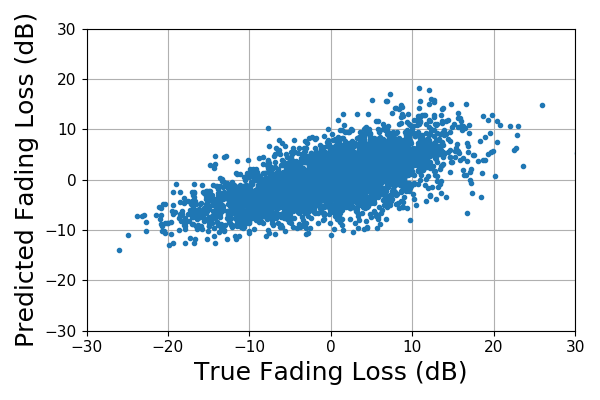

CPU times: user 2.54 s, sys: 325 ms, total: 2.86 s
Wall time: 530 ms


In [13]:
%%time

#============================
# Helper functions
#============================
RxCoordsTest = RxCoordClean[label][TestIndices,:]
TxCoordsTest = TxCoordClean[label][TestIndices,:]

TxCoordsTest1 = copy.deepcopy(TxCoordsTest)
RxCoordsTest1 = copy.deepcopy(RxCoordsTest)
FadLossTest1 = copy.deepcopy(FadLossTest)
print('[Test] txcoords and fadloss shape',np.shape(TxCoordsTest1), np.shape(FadLossTest1))

TxCoordsTest1 -= np.array(BLCoordCamp1)
RxCoordsTest1 -= np.array(BLCoordCamp1)



#============================
# prediction
#============================
t0 = time.time()
FadLossTestEst = predShadLossLinkFast(LossField, 
                                      excessPathLen,
                                      xVals, yVals,
                                      DistPixels, pixelCoords,
                                      TxCoordsTest1, RxCoordsTest1,
                                      delta_p, 
                                      model, debug=1)
print("[Test time]", time.time()-t0)

#----------- Fading Loss Estimation Error -----------------#
FadTestErr = np.sqrt(np.mean(np.abs(FadLossTest1-FadLossTestEst)**2))


print('\n[Test] label model', label, model)
print('[Train] FadEstErr in dB and dB2', errTrain, errTrain**2)
print('[Train] std/var of fadloss in dB',FadLossTrain.std(), FadLossTrain.var())
print('[Train] percent decreased', (FadLossTrain.std()-errTrain)/FadLossTrain.std(), 
      round((FadLossTrain.var()-errTrain**2)/FadLossTrain.var(),4))

print('\n[Test] FadTestErr in dB',FadTestErr, FadTestErr**2)
print('[Test] std of FadLossTest',FadLossTest.std(), FadLossTest.var())
print('[Test] percent decreased', (FadLossTest.std()-FadTestErr)/FadLossTest.std(), 
      round((FadLossTest.var()-FadTestErr**2)/FadLossTest.var(),4) )


plt.figure(figsize=(6,4))#
plt.plot(FadLossTest1, FadLossTestEst, '.')
plt.ylim([-30,30])
plt.xlim([-30,30])
# plt.legend(fontsize=15)
plt.ylabel('Predicted Fading Loss (dB)',fontsize=18)
plt.xlabel('True Fading Loss (dB)',fontsize=18)
plt.grid()
plt.tight_layout()






## check the loss field estimate

label nrows ncols cbrssdr 84 88 7392
nrows_chm, ncols_chm 4200 4400


<IPython.core.display.Javascript object>


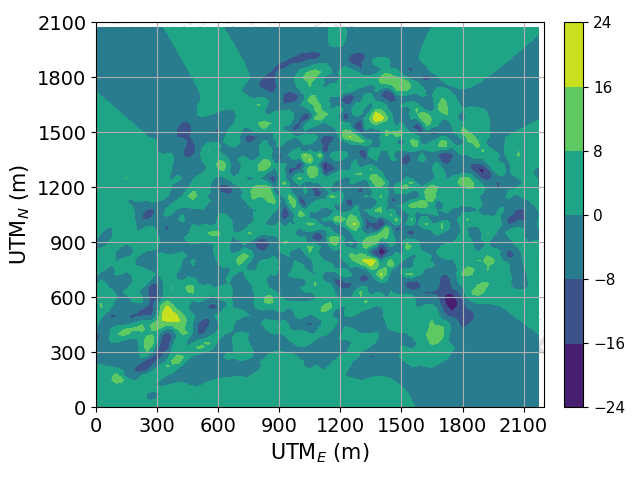

<IPython.core.display.Javascript object>


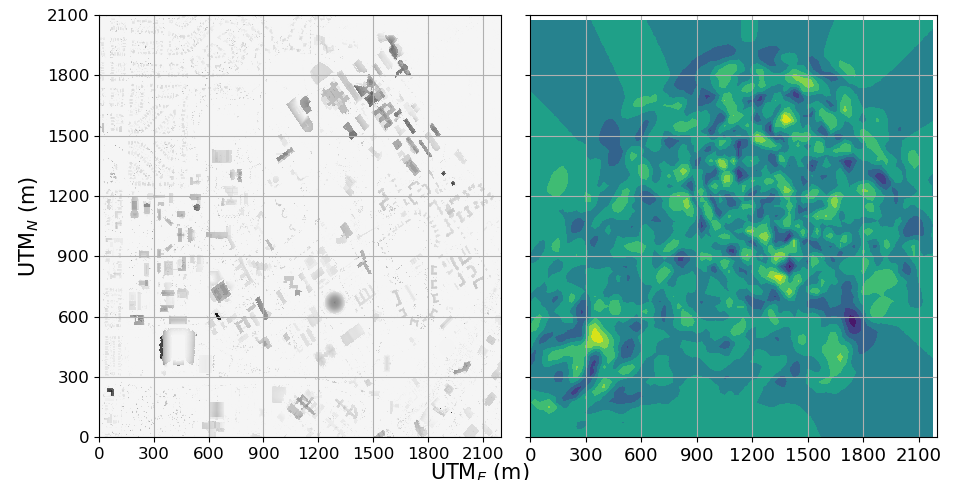

nrows_chm, ncols_chm 4200 4400


In [15]:

# check the loss field
nrows, ncols = len(yVals), len(xVals)
print('label nrows ncols',label, nrows, ncols, nrows*ncols)

ratio_field2chm = delta_p//np.array(dsm_resolution)
contour_x, contour_y = np.arange(0,ncols)*ratio_field2chm[0], np.arange(0,nrows)*ratio_field2chm[1]
mesh_x, mesh_y = np.meshgrid(contour_x, contour_y)

nrows_chm, ncols_chm = np.shape(MapCamp.T)
print('nrows_chm, ncols_chm',nrows_chm, ncols_chm)

#####=============================================##########
## contourf plot of the loss field
fig, ax = plt.subplots(figsize=(6.4,4.8))
  
loc = matplotlib.ticker.MaxNLocator(7)
lvls = loc.tick_values(LossField.min(), LossField.max())
CS2 = ax.contourf(mesh_x, mesh_y, LossField.reshape(nrows, ncols), levels=lvls, 
                   linestyles=np.where(lvls >= 0, "-", "-"))
fig.colorbar(CS2, ax=ax,fraction=0.04, pad=0.04)



campmap = np.flip(MapCamp, axis=1).T
CS1 = ax.imshow(campmap*(campmap>10), cmap="binary",
           alpha=0.5, interpolation = None,
           origin='lower', aspect='0.9') #
ax.set_xlim([0, ncols_chm])
ax.set_ylim([0, nrows_chm])
ax.set_xlabel('UTM$_E$ (m)', fontsize=15)
ax.set_ylabel('UTM$_N$ (m)', fontsize=15)

xticks_chm = np.arange(0,ncols_chm+200,600)
yticks_chm = np.arange(0,nrows_chm+200,600)
xtick_labels_chm = [str(int(i*dsm_resolution[0])) for i in xticks_chm]
ytick_labels_chm = [str(int(i*dsm_resolution[1])) for i in yticks_chm]
ax.set_xticks(xticks_chm) #,fontsize=12,rotation=0)
ax.set_yticks(yticks_chm)
ax.set_xticklabels(xtick_labels_chm,fontsize=14,rotation=0)
ax.set_yticklabels(ytick_labels_chm,fontsize=14,rotation=0)
ax.grid()
plt.tight_layout()


#####=============================================##########
# contourf plot
fig, ax = plt.subplots(1,2, figsize=(9.6,4.8), sharex=True, sharey=True) #) #
CS = ax[1].contourf(mesh_x, mesh_y, LossField.reshape(nrows, ncols)) #,origin='upper')
ax[1].grid()
ax[1].set_xlim([0,ncols])
ax[1].set_ylim([0,nrows]) # upper-flip once, ylim-flip twice
xticks = np.arange(0,ncols,12)
yticks = np.arange(0,nrows+10,12)
ax[1].set_xticks(xticks)
ax[1].set_yticks(yticks)
xtick_labels = [str(i*delta_p) for i in xticks]
ytick_labels = [str(i*delta_p) for i in yticks]
ax[1].set_xticklabels(xtick_labels,fontsize=13)
ax[1].set_yticklabels(ytick_labels,fontsize=13)
ax[0].set_ylabel('UTM$_N$ (m)', fontsize=15)


CS1 = ax[0].imshow(np.flip(MapCamp, axis=1).T, cmap="Greys",
           alpha=2.0, interpolation = None,
           origin='lower', aspect='1.1') #
contour_x, contour_y = np.arange(ncols)*ratio_field2chm[0], np.arange(nrows)*ratio_field2chm[1]
mesh_x, mesh_y = np.meshgrid(contour_x, contour_y)

ax[0].grid()
nrows_chm, ncols_chm = np.shape(MapCamp.T)
print('nrows_chm, ncols_chm',nrows_chm, ncols_chm)


ax[0].set_xlim([0, ncols_chm])
ax[0].set_ylim([0, nrows_chm])
# ax[0].set_xlabel('UTM$_E$ (m)', fontsize=15)
# ax[0].set_ylabel('UTM$_N$ (m)', fontsize=15)
# plt.xticks([])
# plt.yticks([])
xticks_chm = np.arange(0,ncols_chm,600)
yticks_chm = np.arange(0,nrows_chm+200,600)
xtick_labels_chm = [str(int(i*dsm_resolution[0])) for i in xticks_chm]
ytick_labels_chm = [str(int(i*dsm_resolution[1])) for i in yticks_chm]
ax[0].set_xticks(xticks_chm) #,fontsize=12,rotation=0)
ax[0].set_yticks(yticks_chm)
ax[0].set_xticklabels(xtick_labels_chm,fontsize=12,rotation=0)
ax[0].set_yticklabels(ytick_labels_chm,fontsize=12,rotation=0)
fig.text(0.5, 0.015, 'UTM$_E$ (m)', va='center', \
         ha='center', rotation='horizontal', fontsize=15)
plt.tight_layout()


### FadLoss vs. FadLossEst

<IPython.core.display.Javascript object>


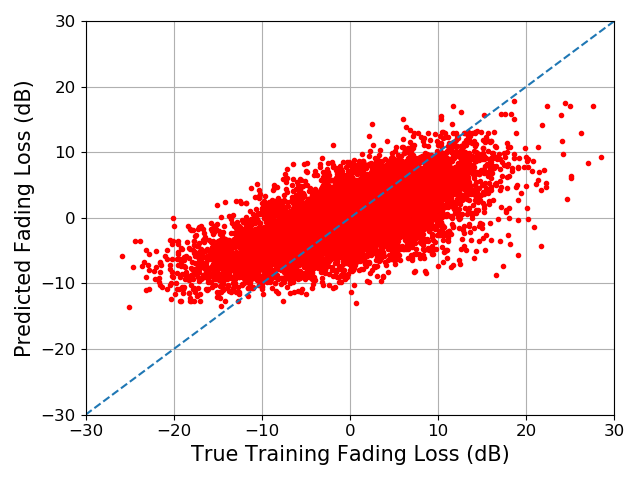

<IPython.core.display.Javascript object>


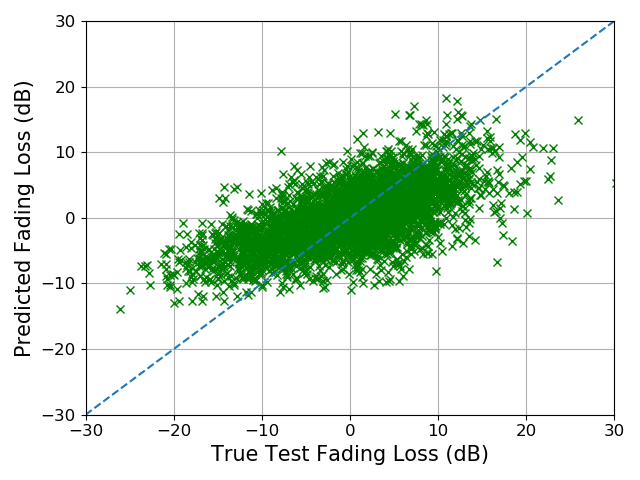

In [63]:
## train
plt.figure()#figsize=(6,4.8)
plt.plot(FadLossTrain, FadLossTrainEst, 'r.')
plt.plot(np.arange(-30,35,5), np.arange(-30,35,5),'--')
plt.ylim([-30,30])
plt.xlim([-30,30])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Predicted Fading Loss (dB)',fontsize=15)
plt.xlabel('True Training Fading Loss (dB)',fontsize=15)
plt.grid()
plt.tight_layout()
# plt.savefig('Results/training_comparison.pdf')


## test
plt.figure()#figsize=(6,4.8)
plt.plot(FadLossTest, FadLossTestEst, 'gx')
plt.plot(np.arange(-30,35,5), np.arange(-30,35,5),'--')
plt.ylim([-30,30])
plt.xlim([-30,30])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Predicted Fading Loss (dB)',fontsize=15)
plt.xlabel('True Test Fading Loss (dB)',fontsize=15)
plt.grid()
plt.tight_layout()
# plt.savefig('Results/testing_comparison.pdf')

